# 2-1. 들어가며

In [2]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


# 2-2. 데이터 다운로드 및 분석

In [3]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [ ]:
$ wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
$ mkdir -p ~/aiffel/sp_tokenizer/data
$ mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data
$ cd ~/aiffel/sp_tokenizer/data
$ tar -xzvf korean-english-park.train.tar.gz

In [4]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


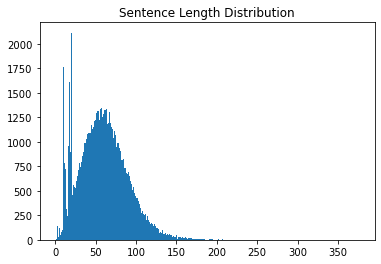

In [5]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [6]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [7]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [16]:
check_sentence_with_length(raw, 11) # 文章の長さが１１値の文章を抽出

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


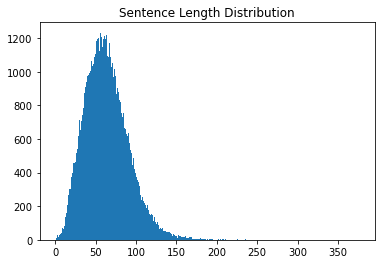

In [9]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

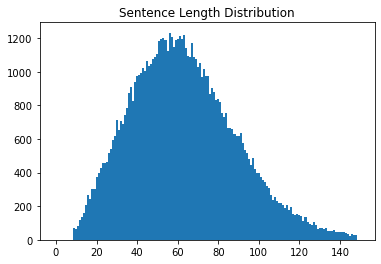

In [10]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 2-3. 공백 기반 토큰화

In [17]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [18]:
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [20]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [21]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


# 2-4. 형태소 기반 토큰화


In [22]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [23]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [29]:
# Case 1
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(mecab_tensor[100])
print(texts[0])

[   89 32459     4    47  4173     7 20708  1050     9   954    53   702
  1952  6758   626   962    10    36     9  3857    72     2     1     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0]
북한 적십자회 는 미국 적십자사 에 위문 메시지 를 전달 해 하루 빨리 재앙 으로부터 회복 하 기 를 바란다고 전했 다 .


In [30]:
# Case 2
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

북한 적십자회 는 미국 적십자사 에 위문 메시지 를 전달 해 하루 빨리 재앙 으로부터 회복 하 기 를 바란다고 전했 다 . 


# 2-5. 프로젝트: SentencePiece 사용하기

In [31]:
$ pip install sentencepiece

SyntaxError: invalid syntax (<ipython-input-31-94ba2bd73105>, line 1)

In [32]:
# Step 2. SentencePiece 모델 학습
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 thuban thuban 376897  4월 15 10:28 korean_spm.model
-rw-r--r-- 1 thuban thuban 146388  4월 15 10:28 korean_spm.vocab


In [33]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [35]:
# Step 3. Tokenizer 함수 작성
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [36]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1949 5662    5    4 7975 1983    3    0    0    0    0    0    0    0]
 [ 107 1638  101    4    0  419   11    4   14    0 1969    3    3    3]]


In [53]:
word_index

{0: '<unk>',
 1: '<s>',
 2: '</s>',
 3: '.',
 4: '▁',
 5: '을',
 6: '의',
 7: '에',
 8: '이',
 9: '를',
 10: '는',
 11: '가',
 12: '은',
 13: ',',
 14: '고',
 15: '에서',
 16: '로',
 17: '한',
 18: '”',
 19: '▁“',
 20: '인',
 21: '일',
 22: ')',
 23: '(',
 24: '과',
 25: '▁이',
 26: '와',
 27: '으로',
 28: '▁있다',
 29: '지',
 30: '▁수',
 31: '도',
 32: '할',
 33: '했다',
 34: '▁밝혔다',
 35: '▁말했다',
 36: '년',
 37: '하고',
 38: '다',
 39: '하는',
 40: '▁있는',
 41: '기',
 42: '리',
 43: '▁그',
 44: '▁전',
 45: '자',
 46: '며',
 47: '스',
 48: '해',
 49: '▁2',
 50: '▁그는',
 51: '된',
 52: '▁1',
 53: '만',
 54: '▁대한',
 55: '▁위해',
 56: '월',
 57: '▁전했다',
 58: '▁미국',
 59: '▁한',
 60: '▁미',
 61: '▁3',
 62: '▁이번',
 63: '▁중',
 64: '▁지난',
 65: '시',
 66: '현지시간',
 67: '라',
 68: '에게',
 69: '나',
 70: '▁대해',
 71: '"',
 72: '사',
 73: '어',
 74: '주',
 75: 's',
 76: '▁것으로',
 77: '▁‘',
 78: '트',
 79: '명이',
 80: '▁것이라고',
 81: '▁것',
 82: '게',
 83: '이라고',
 84: '▁4',
 85: '▁"',
 86: '들이',
 87: '드',
 88: '▁있다고',
 89: '하기',
 90: '대',
 91: '수',
 92: '▁것을',
 93

In [58]:
index_word

{'<unk>': 0,
 '<s>': 1,
 '</s>': 2,
 '.': 3,
 '▁': 4,
 '을': 5,
 '의': 6,
 '에': 7,
 '이': 8,
 '를': 9,
 '는': 10,
 '가': 11,
 '은': 12,
 ',': 13,
 '고': 14,
 '에서': 15,
 '로': 16,
 '한': 17,
 '”': 18,
 '▁“': 19,
 '인': 20,
 '일': 21,
 ')': 22,
 '(': 23,
 '과': 24,
 '▁이': 25,
 '와': 26,
 '으로': 27,
 '▁있다': 28,
 '지': 29,
 '▁수': 30,
 '도': 31,
 '할': 32,
 '했다': 33,
 '▁밝혔다': 34,
 '▁말했다': 35,
 '년': 36,
 '하고': 37,
 '다': 38,
 '하는': 39,
 '▁있는': 40,
 '기': 41,
 '리': 42,
 '▁그': 43,
 '▁전': 44,
 '자': 45,
 '며': 46,
 '스': 47,
 '해': 48,
 '▁2': 49,
 '▁그는': 50,
 '된': 51,
 '▁1': 52,
 '만': 53,
 '▁대한': 54,
 '▁위해': 55,
 '월': 56,
 '▁전했다': 57,
 '▁미국': 58,
 '▁한': 59,
 '▁미': 60,
 '▁3': 61,
 '▁이번': 62,
 '▁중': 63,
 '▁지난': 64,
 '시': 65,
 '현지시간': 66,
 '라': 67,
 '에게': 68,
 '나': 69,
 '▁대해': 70,
 '"': 71,
 '사': 72,
 '어': 73,
 '주': 74,
 's': 75,
 '▁것으로': 76,
 '▁‘': 77,
 '트': 78,
 '명이': 79,
 '▁것이라고': 80,
 '▁것': 81,
 '게': 82,
 '이라고': 83,
 '▁4': 84,
 '▁"': 85,
 '들이': 86,
 '드': 87,
 '▁있다고': 88,
 '하기': 89,
 '대': 90,
 '수': 91,
 '▁것을': 92,
 '▁